# Analisis de Texto sobre la Biblia

En este caso vamos a aplciar el analisis de texto a un caso de uso de analisis del texto de la biblia:

Haremos varias tareas:

- Prepocesado
- Analisis de sentimiento
- Extracción de entidades nombradas
- Predicción de si el texto es de el nuevo testamento o del antiguo

![](https://kbimages1-a.akamaihd.net/b5dd0324-2158-4748-8d20-3abba6ca14af/353/569/90/False/the-holy-bible-old-and-new-testaments-king-james-version.jpg)

## Preparación de datos

Acceso a Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
PATH_MODELOS = '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/models'
PATH_DATOS = '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Vamos a leer el fichero **holy_bible_kjv.csv**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(f'{PATH_DATOS}/holy-bible/holy_bible_kjv.csv')

In [ ]:
df.head()

,id,b,c,v,t
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


Podemos ver la estructura, donde b --> book, es el libro, c --> Chapter es el capitulo, y v --> verse es el versiculo

Para más claridad vamos a sustuir el número del libro por su nombre

In [ ]:
map_book = {
    1: 'Genesis', 2: 'Exodus', 3: 'Leviticus', 4: 'Numbers', 5: 'Deuteronomy', 6: 'Joshua', 7: 'Judges', 8: 'Ruth', 9: '1 Samuel (1 Kings)', 10: '2 Samuel (2 Kings)',
    11: '1 Kings (3 Kings)', 12: '2 Kings (4 Kings)', 13: '1 Chronicles', 14: '2 Chronicles', 15: 'Ezra', 16: 'Nehemiah', 17: 'Esther', 18: 'Job', 19: 'Psalms', 20: 'Proverbs',
    21: 'Ecclesiastes', 22: 'Song of Solomon (Canticles)', 23: 'Isaiah', 24: 'Jeremiah', 25: 'Lamentations', 26: 'Ezekiel', 27: 'Daniel', 28: 'Hosea', 29: 'Joel', 30: 'Amos',
    31: 'Obadiah', 32: 'Jonah', 33: 'Micah', 34: 'Nahum', 35: 'Habakkuk', 36: 'Zephaniah', 37: 'Haggai', 38: 'Zechariah', 39: 'Malachi', 40: 'Matthew',
    41: 'Mark', 42: 'Luke', 43: 'John', 44: 'Acts', 45: 'Romans', 46: '1 Corinthians', 47: '2 Corinthians', 48: 'Galatians', 49: 'Ephesians', 50: 'Philippians',
    51: 'Colossians', 52: '1 Thessalonians', 53: '2 Thessalonians', 54: '1 Timothy', 55: '2 Timothy', 56: 'Titus', 57: 'Philemon', 58: 'Hebrews', 59: 'James', 60: '1 Peter',
    61: '2 Peter', 62: '1 John', 63: '2 John', 64: '3 John', 65: 'Jude', 66: 'Revelation'}

In [ ]:
df['b'].replace(map_book,inplace=True)

In [ ]:
df.head()

,id,b,c,v,t
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ..."
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness..."


Ahora esta un poco más claro

Tambien vamos a cambiar el nombre de las columnas

In [ ]:
df.columns = ["id","libro","capitulo","versiculo","texto"]
df.head()

,id,libro,capitulo,versiculo,texto
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ..."
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness..."


Guardamos para poder reusar el fichero

In [ ]:
df.to_csv(f'{PATH_DATOS}/holy-bible/holy_bible_kjv_clean.csv') # Guardamos en formato CSV

## Analisis del texto

Vamos a explorar las caracteristicas del texto

In [ ]:
df['texto']

0        In the beginning God created the heaven and th...
1        And the earth was without form, and void; and ...
2        And God said, Let there be light: and there wa...
3        And God saw the light, that it was good: and G...
4        And God called the light Day, and the darkness...
                               ...                        
31098    And the Spirit and the bride say, Come. And le...
31099    For I testify unto every man that heareth the ...
31100    And if any man shall take away from the words ...
31101    He which testifieth these things saith, Surely...
31102    The grace of our Lord Jesus Christ be with you...
Name: texto, Length: 31103, dtype: object

Buscamos el mas largo

In [ ]:
df['texto'].str.len().max()

528

Y lo mostramos

In [ ]:
index = df['texto'].str.len().idxmax()
df.iloc[index]

id                                                    17008009
libro                                                   Esther
capitulo                                                     8
versiculo                                                    9
texto        Then were the king's scribes called at that ti...
Name: 12826, dtype: object

Y buscamos tambien el mas corto

In [ ]:
df['texto'].str.len().min()

2

Y lo mostramos

In [ ]:
index = df['texto'].str.len().idxmin()
df.iloc[index]

id           64001015
libro          3 John
capitulo            1
versiculo          15
texto              []
Name: 30673, dtype: object

Vamos a pintar un grafico con la longitud de los textos

Text(0, 0.5, 'Frecuencia')

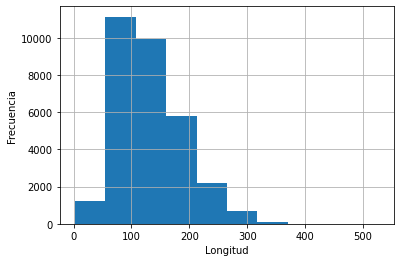

In [ ]:
h = df['texto'].str.len().hist()
h.set_xlabel("Longitud")
h.set_ylabel("Frecuencia")

Vamos a añadir una nueva columna al dataframe con la longitud del texto

In [ ]:
df['longitud'] = df['texto'].str.len()
df.head()

,id,libro,capitulo,versiculo,texto,longitud
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...,54
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ...",142
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G...",85
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness...",115


## Eliminación de Stop Words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stopWords = stopwords.words('english')

def elimiar_stop_words(texto, stop_words = stopWords):
  return ' '.join([word for word in texto.split() if word not in (stop_words)])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['texto_limpio'] = df['texto'].apply(elimiar_stop_words)

Mostramos las palabras más frecuentes

In [ ]:
from collections import Counter
newdf = pd.DataFrame(Counter(" ".join(df["texto_limpio"].str.lower()).split()).most_common(100),
                    columns=['Palabra', 'Frecuencia']).set_index('Palabra')
newdf.head()

,Frecuencia
Palabra,
and,12738
shall,9838
unto,8987
i,8708
thou,5202


Pintamos el resultado

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

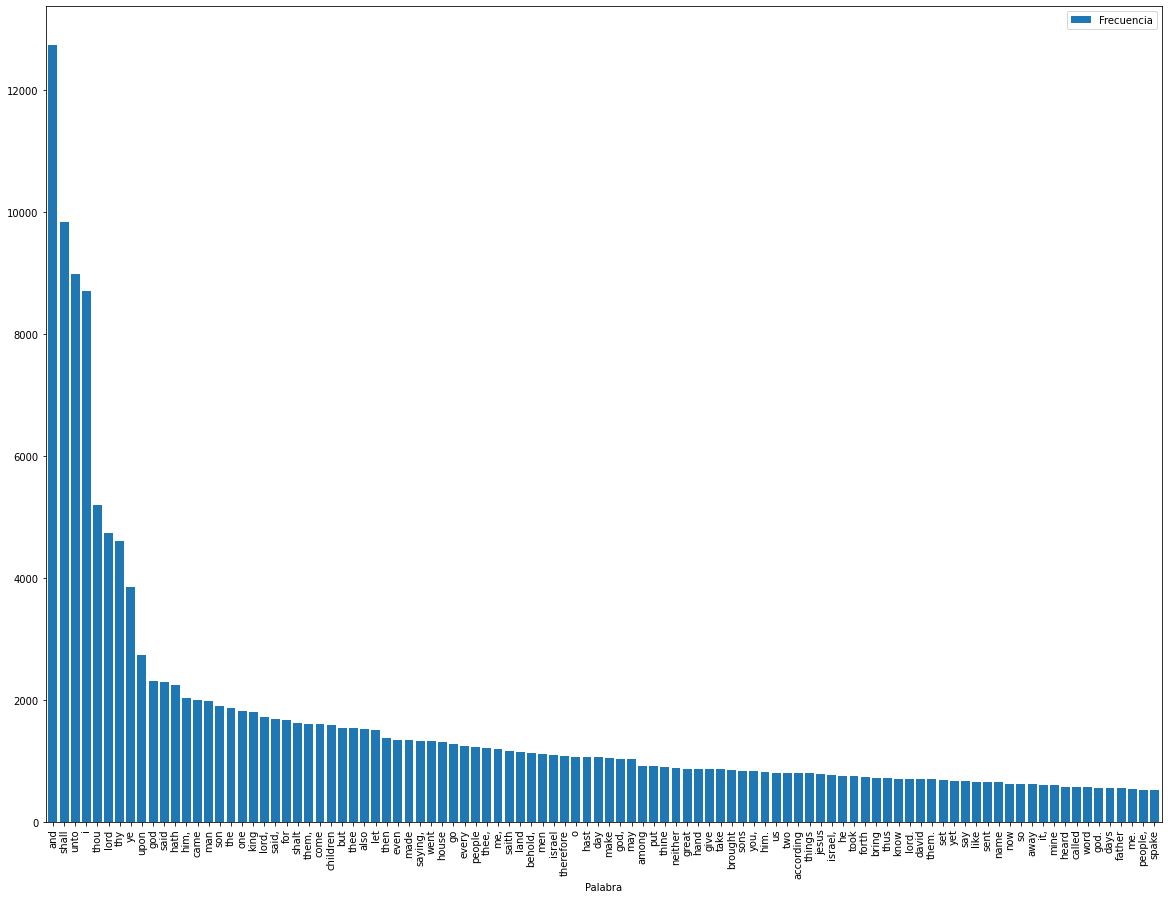

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
newdf.plot.bar(rot=0, figsize=(20,15), width=0.8)
plt.xticks(rotation=90)

## Analisis de sentimientos

Para ello, vamos a usar la librería **TextBlob**, que no s da un modelo preentrenado para el analisis de sentimiento

In [ ]:
# Librería para analisis de entimiento
from textblob import TextBlob

def obtner_sentimiento(texto): # Esta función nos permite obtener el sentimiento de un texto en forma de tupla (polaridad, subjetividad)
    return TextBlob(texto).sentiment # Extraemos el sentimiento(polaridad) de la tupla (polaridad, subjetividad)

Vamos a añadir sentimiento y subjetividad al dataframe

In [ ]:
df['tupla_sentimiento'] = df['texto_limpio'].apply(obtner_sentimiento)
df.head()

,id,libro,capitulo,versiculo,texto,longitud,texto_limpio,tupla_sentimiento
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...,54,In beginning God created heaven earth.,"(0.0, 0.0)"
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ...",142,"And earth without form, void; darkness upon fa...","(0.0, 0.4)"
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54,"And God said, Let light: light.","(0.4, 0.7)"
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G...",85,"And God saw light, good: God divided light dar...","(0.5, 0.6666666666666666)"
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness...",115,"And God called light Day, darkness called Nigh...","(0.325, 0.5166666666666666)"


In [ ]:
df['sentimiento'], df['subjetividad'] = zip(*df['tupla_sentimiento'])
df.head()

,id,libro,capitulo,versiculo,texto,longitud,texto_limpio,tupla_sentimiento,sentimiento,subjetividad
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...,54,In beginning God created heaven earth.,"(0.0, 0.0)",0.000,0.000000
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ...",142,"And earth without form, void; darkness upon fa...","(0.0, 0.4)",0.000,0.400000
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54,"And God said, Let light: light.","(0.4, 0.7)",0.400,0.700000
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G...",85,"And God saw light, good: God divided light dar...","(0.5, 0.6666666666666666)",0.500,0.666667
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness...",115,"And God called light Day, darkness called Nigh...","(0.325, 0.5166666666666666)",0.325,0.516667


Obtener el texto mas positivo

In [ ]:
indice = df['sentimiento'].idxmax()
df.iloc[indice]['texto']

'These are the generations of Noah: Noah was a just man and perfect in his generations, and Noah walked with God.'

Obtener el texto mas negativo

In [ ]:
indice = df['sentimiento'].idxmin()
df.iloc[indice]['texto']

'Behold now, thy servant hath found grace in thy sight, and thou hast magnified thy mercy, which thou hast showed unto me in saving my life; and I cannot escape to the mountain, lest some evil take me, and I die:'

Vamos a ver un histograma con los sentimientos

Text(0, 0.5, 'Frecuencia')

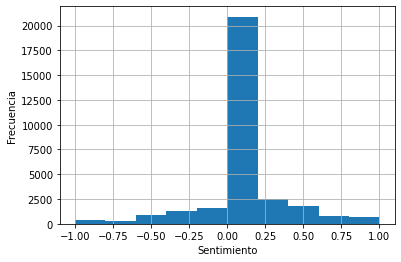

In [ ]:
h = df['sentimiento'].hist()
h.set_xlabel("Sentimiento")
h.set_ylabel("Frecuencia")

## Extracción de entidades nombradas

Ahora vamos a intentar extraer las entidades que aparecen en la biblia

Vamos a crear una función que usando Spacy, extraiga las entidades nombradas

In [ ]:
import spacy 
nlp = spacy.load('en')

In [ ]:
def obtener_ner(text,modelo = nlp):
    docx = nlp(text) # Obtengo el documento del texto
    result = [(token.text,token.label_) for token in docx.ents] # Obtengo las entidades nombradas del documento e una lista de  tuplas del tipo (texto, tipoEntidad)
    return result

In [ ]:
calcular = False

if calcular:
  from tqdm import tqdm
  tqdm.pandas()
  df['entidades_nombradas'] = df['texto_limpio'].progress_apply(obtener_ner)
else:
  df = pd.read_csv(f'{PATH_DATOS}/holy-bible/holy_bible_kjv_final.csv') # Guardamos en formato CSV

In [ ]:
df.head()

,Unnamed: 0,id,libro,capitulo,versiculo,texto,longitud,texto_limpio,tupla_sentimiento,sentimiento,subjetividad,entidades_nombradas
0,0,1001001,Genesis,1,1,In the beginning God created the heaven and th...,54,In beginning God created heaven earth.,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,"[('earth', 'LOC')]"
1,1,1001002,Genesis,1,2,"And the earth was without form, and void; and ...",142,"And earth without form, void; darkness upon fa...","Sentiment(polarity=0.0, subjectivity=0.4)",0.000,0.400000,"[('Spirit', 'ORG')]"
2,2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54,"And God said, Let light: light.","Sentiment(polarity=0.4, subjectivity=0.7)",0.400,0.700000,"[('God', 'PERSON')]"
3,3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G...",85,"And God saw light, good: God divided light dar...","Sentiment(polarity=0.5, subjectivity=0.6666666...",0.500,0.666667,[]
4,4,1001005,Genesis,1,5,"And God called the light Day, and the darkness...",115,"And God called light Day, darkness called Nigh...","Sentiment(polarity=0.325, subjectivity=0.51666...",0.325,0.516667,"[('God', 'PERSON'), ('Night', 'WORK_OF_ART'), ..."


Guardamos todo en Drive

In [ ]:
df.to_csv(f'{PATH_DATOS}/holy-bible/holy_bible_kjv_final.csv') # Guardamos en formato CSV

## Predición de Viejo o Nuevo Testamento

Ahora vamos a intentar hacer un modelo, que prediga si un determinado texto, pertenece a al antiguo testamento, o al nuevo testamento

Para ello, codificaremos la predicción de la siguiente manera:
- Nuevo testamento: **1**
- Viejo Testamento: **0**

Para ello vamos a usar una lista con los libros del antiguo testamento, si no esta en la lista, es del nuevo testamento

In [ ]:
old_testament_book = ['Genesis','Exodus','Leviticus','Numbers','Deuteronomy','Joshua','Judges','Ruth','1 Samuel (1 Kings)','2 Samuel (2 Kings)','1 Kings (3 Kings)','2 Kings (4 Kings)','1 Chronicles','2 Chronicles','Ezra','Nehemiah',
            'Esther','Job','Psalms','Proverbs','Ecclesiastes','Song of Solomon (Canticles)','Isaiah','Jeremiah','Lamentations','Ezekiel','Daniel','Hosea', 'Joel','Amos','Obadiah','Jonah','Micah','Nahum','Habakkuk',
            'Zephaniah','Haggai','Zechariah','Malachi']

In [ ]:
def identificar_testamento(libro, lista_antiguo = old_testament_book):
  if libro in old_testament_book:
    return 0
  else:
    return 1

Aplicamos al dataframe

In [ ]:
df = pd.read_csv(f'{PATH_DATOS}/holy-bible/holy_bible_kjv_final.csv') 

In [ ]:
df['testamento'] = df['libro'].apply(identificar_testamento)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,libro,capitulo,versiculo,texto,longitud,texto_limpio,tupla_sentimiento,sentimiento,subjetividad,entidades_nombradas,testamento
0,0,0,1001001,Genesis,1,1,In the beginning God created the heaven and th...,54,In beginning God created heaven earth.,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,"[('earth', 'LOC')]",0
1,1,1,1001002,Genesis,1,2,"And the earth was without form, and void; and ...",142,"And earth without form, void; darkness upon fa...","Sentiment(polarity=0.0, subjectivity=0.4)",0.000,0.400000,"[('Spirit', 'ORG')]",0
2,2,2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54,"And God said, Let light: light.","Sentiment(polarity=0.4, subjectivity=0.7)",0.400,0.700000,"[('God', 'PERSON')]",0
3,3,3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G...",85,"And God saw light, good: God divided light dar...","Sentiment(polarity=0.5, subjectivity=0.6666666...",0.500,0.666667,[],0
4,4,4,1001005,Genesis,1,5,"And God called the light Day, and the darkness...",115,"And God called light Day, darkness called Nigh...","Sentiment(polarity=0.325, subjectivity=0.51666...",0.325,0.516667,"[('God', 'PERSON'), ('Night', 'WORK_OF_ART'), ...",0


### Entrenamiento de un Naive Bayes para identificar el testamento

Importaciones

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # Esto nos servira para contar la frecuencia de apararición de las palabras
from sklearn.model_selection import train_test_split # Esto nos servira para realziar la división de conjuntos de entrenamiento y de test
from sklearn.naive_bayes import MultinomialNB # El modelo que vamos a usar

Iniciamos un modelo CountVectorizer para extraer los vectores de frecuencia de las palabras

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(df['texto_limpio']) # Extraemos el conjunto de entrenamiento, como un vector de frecuencias de palabras sobre el diccionario
y = df['testamento'] # La variable que queremos predecir

Podemos ver el resultado, que basicmanete es una matriz para todas las palabras del diccionario, donde aparece para cada frase del texto, la frecuencia de las palabras

In [ ]:
pd.DataFrame(data=X.toarray(),columns = cv.get_feature_names_out()).head()

,aaron,aaronites,abaddon,abagtha,abana,abarim,abase,abased,abasing,abated,...,zorathites,zoreah,zorites,zorobabel,zuar,zuph,zur,zuriel,zurishaddai,zuzims
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Separamos los datos de entranamiento y de test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # Vamos a usar 1/3 para test, y 2/3 para entrenamiento. Tambien ponemos una semilla (42), para que siempre produzca los mismos resultados 

In [ ]:
print(f'Tamaño de entrenamiento: {X_train.shape[0]},\tTamaño del vector de palabras: {X_train.shape[1]}')
print(f'Tamaño de test: {X_test.shape[0]},\tTamaño del vector de palabras: {X_test.shape[1]}')

Tamaño de entrenamiento: 20839,	Tamaño del vector de palabras: 12585
Tamaño de test: 10264,	Tamaño del vector de palabras: 12585


Entrenamiento del clasificador

In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB() # Instanciamos el clasificador
clf.fit(X_train,y_train) # Le pasamos datos de entrenamiento

MultinomialNB()

Precisión para el conjunto de entrenamiento

In [ ]:
# Accuracy of our Model
print("Accuracy of Model",clf.score(X_train,y_train)*100,"%")

Accuracy of Model 94.37592974710878 %


Precissión para el conjunto de Test

In [ ]:
# Accuracy of our Model
print("Accuracy of Model",clf.score(X_test,y_test)*100,"%")

Accuracy of Model 91.77708495713173 %


Testeamos de forma aleatoria 

In [ ]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [ ]:
import random
def mostrar_predicciones_aleatorias(model,cv,df,n):
  for i in range(0,n):
    rindx = random.randrange(0,len(df))
    row = df.iloc[rindx]
    x_row = cv.transform([row['texto_limpio']]).toarray()
    y_real = row['testamento']
    y_predicted = clf.predict(x_row)
    print(f"{bcolors.OKBLUE if y_real == y_predicted[0] else bcolors.FAIL} {'-'*100}\nTexto: {row['texto']},\tLibro: {row['libro']}\nStatus: {'Acierto' if y_real == y_predicted[0] else 'Fallo'}\tReal: {y_real}\tPredicho: {y_predicted[0]} {bcolors.ENDC}")

In [ ]:
mostrar_predicciones_aleatorias(clf,cv,df,10)

 ----------------------------------------------------------------------------------------------------
Texto: And there are three that bear witness in earth, the Spirit, and the water, and the blood: and these three agree in one.,	Libro: 1 John
Status: Acierto	Real: 1	Predicho: 1 
 ----------------------------------------------------------------------------------------------------
Texto: And after the reading of the law and the prophets the rulers of the synagogue sent unto them, saying, Ye men and brethren, if ye have any word of exhortation for the people, say on.,	Libro: Acts
Status: Acierto	Real: 1	Predicho: 1 
 ----------------------------------------------------------------------------------------------------
Texto: Thou shalt not uncover the nakedness of thy father's sister: she is thy father's near kinswoman.,	Libro: Leviticus
Status: Acierto	Real: 0	Predicho: 0 
 ----------------------------------------------------------------------------------------------------
Texto: And she 

Pintamos la matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_test_predicted = clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_test_predicted)

In [ ]:
# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(matrix, index=['Old','New'], columns=['Old','New'])

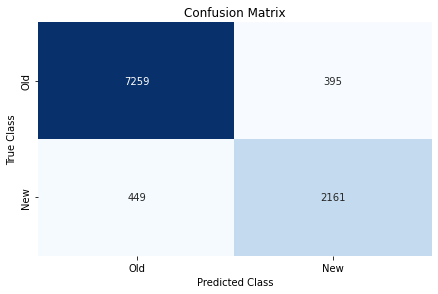

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# crear mapa de calor dibujar mapa de calor
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Guardamos el modelo

In [ ]:
import joblib

In [ ]:
biblepredictionNV_model = open(f"{PATH_MODELOS}/biblepredictionNV_model.pkl","wb")
joblib.dump(clf,biblepredictionNV_model)
biblepredictionNV_model.close()